# 2. Data preprocess & expolore

## 2.1 Make dataframe with raw data

- Check data list

### 구글드라이브 비즈랩 폴더에서 **중국선물 폴더를 우클릭 한 후** 
### 드라이브에 바로가기 추가 -> 내 드라이브 바로가기 추가 하시면 됩니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import notebook
from pathlib import Path
from datetime import datetime, timedelta
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- Check nan values

- Just use observation after 3:
- Make price & return dataframe

In [3]:
path = '/content/drive/MyDrive/중국 선물/data/'

In [4]:
group2 = pd.read_csv(path + 'group2_log_dif.csv', index_col =0, parse_dates = True)
group2_price = pd.read_csv(path + 'group2_log.csv', index_col =0, parse_dates = True)

In [5]:
group2.head()

,KQ.m@SHFE.cu,KQ.m@SHFE.al,KQ.m@SHFE.zn,KQ.m@SHFE.rb
datetime,,,,
2020-08-03 09:01:00,0.001575,0.001031,-0.000265,0.001055
2020-08-03 09:02:00,-0.002363,-0.001375,-0.004511,0.001317
2020-08-03 09:03:00,-0.003555,-0.000344,0.000798,-0.001053
2020-08-03 09:04:00,-0.000990,-0.001721,-0.002128,0.000000
2020-08-03 09:05:00,-0.001387,-0.000345,-0.005073,-0.001582


In [6]:
group2_price.head()

,KQ.m@SHFE.cu,KQ.m@SHFE.al,KQ.m@SHFE.zn,KQ.m@SHFE.rb
datetime,,,,
2020-08-03 09:01:00,10.836439,9.586033,9.846123,8.241176
2020-08-03 09:02:00,10.834076,9.584659,9.841612,8.242493
2020-08-03 09:03:00,10.830520,9.584315,9.842410,8.241440
2020-08-03 09:04:00,10.829531,9.582593,9.840281,8.241440
2020-08-03 09:05:00,10.828143,9.582249,9.835209,8.239857


## 2.2 Expore price & return

 - Summary stat

In [7]:
from scipy.stats import skew, kurtosis
from statsmodels.stats.stattools import jarque_bera

def desc_statics(data):
    describe = data.describe()
    # 왜도
    describe.loc["skew"] = skew(data)

    # 첨도
    describe.loc["kurt"] = kurtosis(data, fisher = False)

    #자크베라
    describe.loc["j_b"] = jarque_bera(data)[0]
    
    return describe

## 선물 기초통계량

In [8]:
desc_statics(group2_price)

,KQ.m@SHFE.cu,KQ.m@SHFE.al,KQ.m@SHFE.zn,KQ.m@SHFE.rb
count,20563.000000,20563.000000,20563.000000,20563.000000
mean,10.849410,9.582839,9.882764,8.213808
std,0.011729,0.014413,0.019352,0.026772
min,10.810334,9.512295,9.835209,8.160518
25%,10.843690,9.574289,9.867860,8.193400
50%,10.849531,9.584659,9.886596,8.212840
75%,10.858229,9.593219,9.896966,8.238008
max,10.877858,9.613803,9.925738,8.262817
skew,-0.587480,-0.997155,-0.167646,-0.052540
kurt,3.205425,4.538354,2.196767,1.805891


In [9]:
desc_statics(group2)

,KQ.m@SHFE.cu,KQ.m@SHFE.al,KQ.m@SHFE.zn,KQ.m@SHFE.rb
count,20563.000000,2.056300e+04,2.056300e+04,2.056300e+04
mean,-0.000002,7.529804e-07,-7.970376e-07,-2.895716e-06
std,0.000461,1.067047e-03,1.067951e-03,7.687534e-04
min,-0.004841,-1.530642e-02,-1.496416e-02,-1.736851e-02
25%,-0.000195,-3.425244e-04,-2.603150e-04,-2.731867e-04
50%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000195,3.422899e-04,2.602472e-04,2.732614e-04
max,0.005846,1.501035e-02,1.527538e-02,1.789339e-02
skew,0.045697,1.107721e-01,-2.250626e-01,-1.272428e-01
kurt,9.153793,8.933080e+01,9.328637e+01,2.008443e+02


In [10]:
corr = group2.corr()
corr

,KQ.m@SHFE.cu,KQ.m@SHFE.al,KQ.m@SHFE.zn,KQ.m@SHFE.rb
KQ.m@SHFE.cu,1.000000,0.128235,0.247047,0.128246
KQ.m@SHFE.al,0.128235,1.000000,0.065940,0.034421
KQ.m@SHFE.zn,0.247047,0.065940,1.000000,0.055854
KQ.m@SHFE.rb,0.128246,0.034421,0.055854,1.000000


- In this example standard scaler with price
- Originally, the exchange rate is applied
- Also you can use any scaler with scipy or etc...



# 3. Analysis


- predict model, pair trading

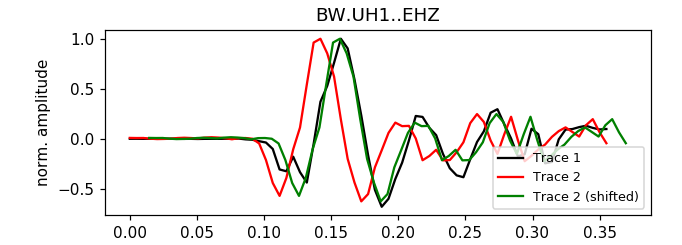

## 3.1 ADF 단위근 검정

In [11]:
adftest_price = round(group2_price.apply(lambda x: adfuller(x, autolag = 'BIC')[0:2]).T,3)
adftest_price.columns = ['T-statics', 'P-values']

In [12]:
adftest_price

,T-statics,P-values
KQ.m@SHFE.cu,-3.538,0.007
KQ.m@SHFE.al,-2.558,0.102
KQ.m@SHFE.zn,-2.767,0.063
KQ.m@SHFE.rb,-1.580,0.494


In [13]:
adftest = round(group2.apply(lambda x: adfuller(x, autolag = 'BIC')[0:2]).T,3)
adftest.columns = ['T-statics', 'P-values']

In [14]:
adftest # 모두 안정시계열

,T-statics,P-values
KQ.m@SHFE.cu,-108.978,0.0
KQ.m@SHFE.al,-22.154,0.0
KQ.m@SHFE.zn,-23.561,0.0
KQ.m@SHFE.rb,-25.906,0.0


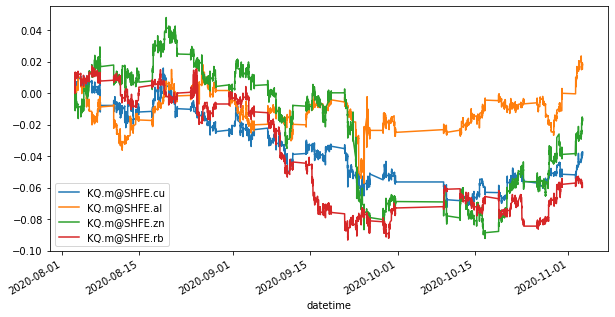

In [15]:
group2.cumsum().plot(figsize = (10,5))

## VAR summary

In [16]:
from statsmodels.tsa.api import VAR

## 그래인저 인과관계

In [17]:
def granger_causality(rtn):
    
    model = VAR(rtn)
    results = model.fit(maxlags=30, ic='bic')

    corr = rtn.corr()
    temp_F = pd.DataFrame().reindex_like(corr)
    
    for i in rtn.columns:
        for j in rtn.columns:
            stat = results.test_causality(i,j).summary()
            if i != j:
                f = stat.data[1][0]
                p = stat.data[1][2]
                temp_F.loc[i,j] = str(np.round(f, 3)) + {p < 0.1 : '(*)', p < 0.05 : '(**)', p < 0.01 : '(***)'}.get(True,'')
            
            else:
                temp_F.loc[i,j] = '-'
    print(f"Model lag order is : {results.k_ar}")
    return temp_F.T

In [18]:
group2

,KQ.m@SHFE.cu,KQ.m@SHFE.al,KQ.m@SHFE.zn,KQ.m@SHFE.rb
datetime,,,,
2020-08-03 09:01:00,0.001575,0.001031,-0.000265,0.001055
2020-08-03 09:02:00,-0.002363,-0.001375,-0.004511,0.001317
2020-08-03 09:03:00,-0.003555,-0.000344,0.000798,-0.001053
2020-08-03 09:04:00,-0.000990,-0.001721,-0.002128,0.000000
2020-08-03 09:05:00,-0.001387,-0.000345,-0.005073,-0.001582
...,...,...,...,...
2020-11-03 14:55:00,0.000193,0.000000,-0.000251,-0.000269
2020-11-03 14:56:00,0.000000,0.000000,-0.000251,-0.000270
2020-11-03 14:57:00,0.000579,-0.001014,-0.000502,-0.000270


In [19]:
causal_group2 = granger_causality(group2)
causal_group2.columns = ['구리', '알루미늄', '아연','강철봉']
causal_group2.index = ['구리', '알루미늄', '아연','강철봉']

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 3


In [20]:
causal_group2

,구리,알루미늄,아연,강철봉
구리,-,26.009(***),91.567(***),23.4(***)
알루미늄,3.9(***),-,2.409(*),0.551
아연,3.743(**),4.309(***),-,4.05(***)
강철봉,4.74(***),2.143(*),3.574(**),-


## 충격반응함수

In [21]:
model = VAR(group2)
results = model.fit(5, ic = 'bic')
irf = results.irf(10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [22]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 06, Dec, 2020
Time:                     07:44:30
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -57.7819
Nobs:                     20560.0    HQIC:                  -57.7954
Log likelihood:           477562.    FPE:                7.88763e-26
AIC:                     -57.8019    Det(Omega_mle):     7.86771e-26
--------------------------------------------------------------------
Results for equation KQ.m@SHFE.cu
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.000002         0.000003           -0.565           0.572
L1.KQ.m@SHFE.cu        -0.105111         0.007378          -14.246           0.000
L1.KQ.m@SHFE.al         0.005991         0.00

In [23]:
round(results.params,6).astype(str) + results.pvalues.applymap(lambda x: {x < 0.1 : '(*)', x < 0.05 : '(**)', x < 0.01 : '(***)'}.get(True,'')) 

,KQ.m@SHFE.cu,KQ.m@SHFE.al,KQ.m@SHFE.zn,KQ.m@SHFE.rb
const,-2e-06,2e-06,-0.0,-5e-06
L1.KQ.m@SHFE.cu,-0.105111(***),0.124378(***),0.261488(***),0.089836(***)
L1.KQ.m@SHFE.al,0.005991(*),-0.530594(***),0.012602(*),0.006289
L1.KQ.m@SHFE.zn,0.010608(***),0.020823(***),-0.440525(***),0.013305(**)
L1.KQ.m@SHFE.rb,0.016407(***),0.020956(**),0.031707(***),-0.423472(***)
L2.KQ.m@SHFE.cu,-0.039825(***),0.065157(***),0.047963(***),0.045887(***)
L2.KQ.m@SHFE.al,0.012637(***),-0.251475(***),0.021109(***),0.00273
L2.KQ.m@SHFE.zn,0.006007,0.01998(***),-0.110475(***),0.016217(***)
L2.KQ.m@SHFE.rb,0.010952(**),0.006983,0.015231,-0.202985(***)
L3.KQ.m@SHFE.cu,-0.007545,0.032892(**),0.018205,0.015165


Figure(720x720)


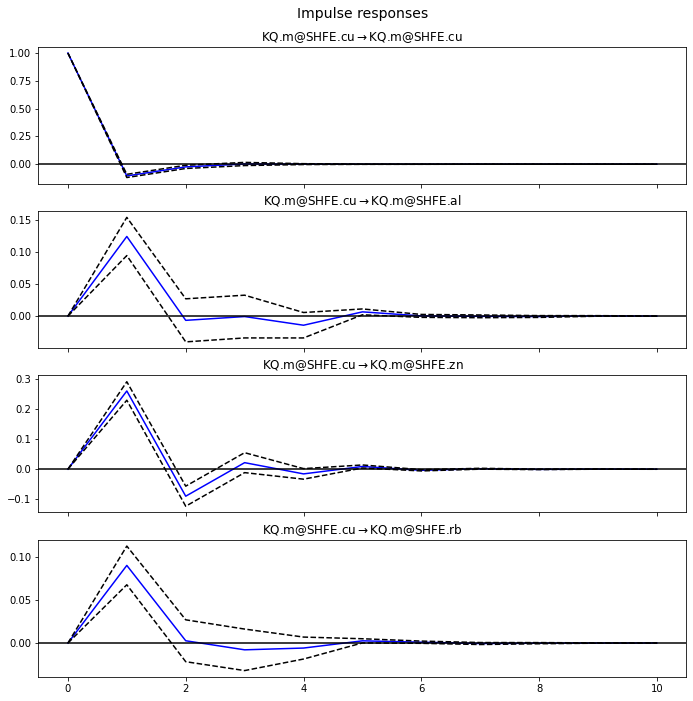

In [24]:
print(irf.plot(impulse = 'KQ.m@SHFE.cu'))

In [25]:
results.fevd(10).summary()

FEVD for KQ.m@SHFE.cu
     KQ.m@SHFE.cu  KQ.m@SHFE.al  KQ.m@SHFE.zn  KQ.m@SHFE.rb
0        1.000000      0.000000      0.000000      0.000000
1        0.998677      0.000191      0.000509      0.000623
2        0.998315      0.000534      0.000510      0.000640
3        0.998148      0.000610      0.000572      0.000671
4        0.998129      0.000617      0.000580      0.000673
5        0.998126      0.000619      0.000580      0.000675
6        0.998124      0.000620      0.000580      0.000676
7        0.998124      0.000620      0.000580      0.000676
8        0.998124      0.000620      0.000580      0.000676
9        0.998124      0.000620      0.000580      0.000676

FEVD for KQ.m@SHFE.al
     KQ.m@SHFE.cu  KQ.m@SHFE.al  KQ.m@SHFE.zn  KQ.m@SHFE.rb
0        0.022696      0.977304      0.000000      0.000000
1        0.017906      0.981549      0.000356      0.000190
2        0.017892      0.981516      0.000356      0.000235
3        0.017893      0.981450      0.000363      0.00